In [0]:
#Fonte: https://dados.gov.br/dataset/painel-de-produtores-de-derivados-producao-de-biocombustiveis
etanol_materiaprima_path = '/FileStore/tables/etanol/landing/etanol_materiaprima.csv'

In [0]:
from pyspark.sql.types import *

schema_etanol_materiaprima = StructType([
    StructField("ano", StringType(), False),
    StructField("estado", StringType(), False),
    StructField("mes_ano", StringType(), False),
    StructField("produto", StringType(), False),
    StructField("qtd_processada", StringType(), False),
    StructField("regiao", StringType(), False)
])
etanol_materiaprima_1 = spark.read.schema(schema_etanol_materiaprima).csv(etanol_materiaprima_path, header=True)
etanol_materiaprima_1.show()

+----+-------+-------+--------------------+--------------+--------+
| ano| estado|mes_ano|             produto|qtd_processada|  regiao|
+----+-------+-------+--------------------+--------------+--------+
|2019|Alagoas|01/2019|      CANA DE AÇÚCAR|   1090378,479|NORDESTE|
|2019|Alagoas|01/2019|              MELAÇO|     99221,386|NORDESTE|
|2019|Alagoas|02/2019|      CANA DE AÇÚCAR|    513731,431|NORDESTE|
|2019|Alagoas|02/2019|              MELAÇO|     77436,212|NORDESTE|
|2019|Alagoas|03/2019|BAGAÇO OU PALHA D...|       6188,34|NORDESTE|
|2019|Alagoas|03/2019|      CANA DE AÇÚCAR|    246869,989|NORDESTE|
|2019|Alagoas|03/2019|              MELAÇO|      55484,54|NORDESTE|
|2019|Alagoas|04/2019|BAGAÇO OU PALHA D...|       6445,67|NORDESTE|
|2019|Alagoas|04/2019|      CANA DE AÇÚCAR|     73911,719|NORDESTE|
|2019|Alagoas|04/2019|              MELAÇO|     13644,894|NORDESTE|
|2019|Alagoas|08/2019|      CANA DE AÇÚCAR|     74498,029|NORDESTE|
|2019|Alagoas|08/2019|              MELAÇO|     

In [0]:
from pyspark.sql.functions import regexp_replace
etanol_materiaprima_2 = etanol_materiaprima_1.withColumn('qtd_processada', regexp_replace('qtd_processada', ',', '.'))
etanol_materiaprima_3 = etanol_materiaprima_2.withColumn("qtd_processada", etanol_materiaprima_2["qtd_processada"].cast(DoubleType()))

In [0]:
etanol_materiaprima_4 = etanol_materiaprima_3.select("mes_ano", "produto", "qtd_processada","regiao")
etanol_materiaprima_4.show()

+-------+--------------------+--------------+--------+
|mes_ano|             produto|qtd_processada|  regiao|
+-------+--------------------+--------------+--------+
|01/2019|      CANA DE AÇÚCAR|   1090378.479|NORDESTE|
|01/2019|              MELAÇO|     99221.386|NORDESTE|
|02/2019|      CANA DE AÇÚCAR|    513731.431|NORDESTE|
|02/2019|              MELAÇO|     77436.212|NORDESTE|
|03/2019|BAGAÇO OU PALHA D...|       6188.34|NORDESTE|
|03/2019|      CANA DE AÇÚCAR|    246869.989|NORDESTE|
|03/2019|              MELAÇO|      55484.54|NORDESTE|
|04/2019|BAGAÇO OU PALHA D...|       6445.67|NORDESTE|
|04/2019|      CANA DE AÇÚCAR|     73911.719|NORDESTE|
|04/2019|              MELAÇO|     13644.894|NORDESTE|
|08/2019|      CANA DE AÇÚCAR|     74498.029|NORDESTE|
|08/2019|              MELAÇO|      9590.324|NORDESTE|
|09/2019|      CANA DE AÇÚCAR|     492015.91|NORDESTE|
|09/2019|              MELAÇO|     59493.455|NORDESTE|
|10/2019|      CANA DE AÇÚCAR|    872481.722|NORDESTE|
|10/2019| 

In [0]:
etanol_materiaprima_5 = etanol_materiaprima_4.na.fill(0)
etanol_materiaprima_5.show()

+-------+--------------------+--------------+--------+
|mes_ano|             produto|qtd_processada|  regiao|
+-------+--------------------+--------------+--------+
|01/2019|      CANA DE AÇÚCAR|   1090378.479|NORDESTE|
|01/2019|              MELAÇO|     99221.386|NORDESTE|
|02/2019|      CANA DE AÇÚCAR|    513731.431|NORDESTE|
|02/2019|              MELAÇO|     77436.212|NORDESTE|
|03/2019|BAGAÇO OU PALHA D...|       6188.34|NORDESTE|
|03/2019|      CANA DE AÇÚCAR|    246869.989|NORDESTE|
|03/2019|              MELAÇO|      55484.54|NORDESTE|
|04/2019|BAGAÇO OU PALHA D...|       6445.67|NORDESTE|
|04/2019|      CANA DE AÇÚCAR|     73911.719|NORDESTE|
|04/2019|              MELAÇO|     13644.894|NORDESTE|
|08/2019|      CANA DE AÇÚCAR|     74498.029|NORDESTE|
|08/2019|              MELAÇO|      9590.324|NORDESTE|
|09/2019|      CANA DE AÇÚCAR|     492015.91|NORDESTE|
|09/2019|              MELAÇO|     59493.455|NORDESTE|
|10/2019|      CANA DE AÇÚCAR|    872481.722|NORDESTE|
|10/2019| 

In [0]:
etanol_materiaprima_5.printSchema()

root
 |-- mes_ano: string (nullable = true)
 |-- produto: string (nullable = true)
 |-- qtd_processada: double (nullable = false)
 |-- regiao: string (nullable = true)



In [0]:
from pyspark.sql.functions import to_date, unix_timestamp

etanol_materiaprima_6 = etanol_materiaprima_5.withColumn('mes_ano',to_date(unix_timestamp('mes_ano', 'MM/yyyy').cast('timestamp')))

In [0]:
etanol_materiaprima_6.show()

+----------+--------------------+--------------+--------+
|   mes_ano|             produto|qtd_processada|  regiao|
+----------+--------------------+--------------+--------+
|2019-01-01|      CANA DE AÇÚCAR|   1090378.479|NORDESTE|
|2019-01-01|              MELAÇO|     99221.386|NORDESTE|
|2019-02-01|      CANA DE AÇÚCAR|    513731.431|NORDESTE|
|2019-02-01|              MELAÇO|     77436.212|NORDESTE|
|2019-03-01|BAGAÇO OU PALHA D...|       6188.34|NORDESTE|
|2019-03-01|      CANA DE AÇÚCAR|    246869.989|NORDESTE|
|2019-03-01|              MELAÇO|      55484.54|NORDESTE|
|2019-04-01|BAGAÇO OU PALHA D...|       6445.67|NORDESTE|
|2019-04-01|      CANA DE AÇÚCAR|     73911.719|NORDESTE|
|2019-04-01|              MELAÇO|     13644.894|NORDESTE|
|2019-08-01|      CANA DE AÇÚCAR|     74498.029|NORDESTE|
|2019-08-01|              MELAÇO|      9590.324|NORDESTE|
|2019-09-01|      CANA DE AÇÚCAR|     492015.91|NORDESTE|
|2019-09-01|              MELAÇO|     59493.455|NORDESTE|
|2019-10-01|  

In [0]:
etanol_materiaprima_6.write.option('header', 'true').parquet('/FileStore/tables/etanol/processing/etanol_materiaprima.parquet')

In [0]:
etanol_materiaprima_processing_path = '/FileStore/tables/etanol/processing/etanol_materiaprima.parquet'
etanol_materiaprima_processing = spark.read.parquet(etanol_materiaprima_processing_path)
etanol_materiaprima_processing.show()

+----------+--------------------+--------------+--------+
|   mes_ano|             produto|qtd_processada|  regiao|
+----------+--------------------+--------------+--------+
|2019-01-01|      CANA DE AÇÚCAR|   1090378.479|NORDESTE|
|2019-01-01|              MELAÇO|     99221.386|NORDESTE|
|2019-02-01|      CANA DE AÇÚCAR|    513731.431|NORDESTE|
|2019-02-01|              MELAÇO|     77436.212|NORDESTE|
|2019-03-01|BAGAÇO OU PALHA D...|       6188.34|NORDESTE|
|2019-03-01|      CANA DE AÇÚCAR|    246869.989|NORDESTE|
|2019-03-01|              MELAÇO|      55484.54|NORDESTE|
|2019-04-01|BAGAÇO OU PALHA D...|       6445.67|NORDESTE|
|2019-04-01|      CANA DE AÇÚCAR|     73911.719|NORDESTE|
|2019-04-01|              MELAÇO|     13644.894|NORDESTE|
|2019-08-01|      CANA DE AÇÚCAR|     74498.029|NORDESTE|
|2019-08-01|              MELAÇO|      9590.324|NORDESTE|
|2019-09-01|      CANA DE AÇÚCAR|     492015.91|NORDESTE|
|2019-09-01|              MELAÇO|     59493.455|NORDESTE|
|2019-10-01|  

In [0]:
etanol_materiaprima_processing.createOrReplaceTempView("etanol_materiaprimaView")

In [0]:
qtd_processada_mes = spark.sql("SELECT mes_ano, SUM(qtd_processada) as qtd_processada FROM etanol_materiaprimaView group by mes_ano order by mes_ano")
display(qtd_processada_mes)

mes_ano,qtd_processada
2019-01-01,3688869.7159999995
2019-02-01,1944297.711
2019-03-01,6874935.742999998
2019-04-01,3.0323023886E7
2019-05-01,5.0728594433000006E7
2019-06-01,5.397220806400001E7
2019-07-01,5.6868207829E7
2019-08-01,5.734507054299999E7
2019-09-01,4.9519780799E7
2019-10-01,4.885167990399999E7


In [0]:
qtd_processada_materiaprima = spark.sql("SELECT produto, SUM(qtd_processada) as qtd_processada FROM etanol_materiaprimaView group by produto order by qtd_processada desc")
display(qtd_processada_materiaprima)

produto,qtd_processada
CANA DE AÇÚCAR,9.94822425579E8
MELAÇO,2.610813800999999E7
MILHO,1.5990975099999998E7
OUTRAS MATÉRIAS - PRIMAS,2286918.7519999994
BAGAÇO OU PALHA DE CANA,199747.01000000004


In [0]:
qtd_processada_regiao = spark.sql("SELECT regiao, SUM(qtd_processada) as qtd_processada FROM etanol_materiaprimaView group by regiao order by qtd_processada desc")
display(qtd_processada_regiao)

regiao,qtd_processada
SUDESTE,5.94761615266E8
CENTRO OESTE,3.28691342089E8
NORDESTE,6.003787893600001E7
SUL,4.681275699800001E7
NORTE,9104611.162


In [0]:
qtd_processada_mes.write.parquet('/FileStore/tables/etanol/curated/qtd_processada_mes.parquet')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [0]:
dataset_path = '/FileStore/tables/etanol/curated/qtd_processada_mes.parquet'
dataset = spark.read.parquet(dataset_path)
dataset = dataset.toPandas()

In [0]:
time_series = dataset.set_index(['mes_ano'])
time_series.index = pd.to_datetime(time_series.index)
time_series

,qtd_processada
mes_ano,
2019-01-01,3.688870e+06
2019-02-01,1.944298e+06
2019-03-01,6.874936e+06
2019-04-01,3.032302e+07
2019-05-01,5.072859e+07
2019-06-01,5.397221e+07
2019-07-01,5.686821e+07
2019-08-01,5.734507e+07
2019-09-01,4.951978e+07


Out[30]: [<matplotlib.lines.Line2D at 0x7fa3281a93a0>]

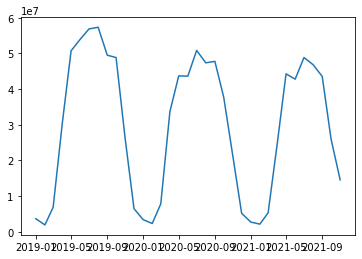

In [0]:
plt.plot(time_series)

In [0]:
model = ExponentialSmoothing(endog = time_series.qtd_processada.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = model.forecast(steps = 12)
predictions

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
Out[41]: 2021-12-01   -5.201396e+06
2022-01-01   -9.454510e+06
2022-02-01   -1.145185e+07
2022-03-01   -8.160786e+06
2022-04-01    1.364428e+07
2022-05-01    3.177561e+07
2022-06-01    3.204666e+07
2022-07-01    3.930806e+07
2022-08-01    3.792896e+07
2022-09-01    3.505610e+07
2022-10-01    2.286628e+07
2022-11-01    9.769953e+06
Freq: MS, dtype: float64

Out[42]: [<matplotlib.lines.Line2D at 0x7fa323d41250>]

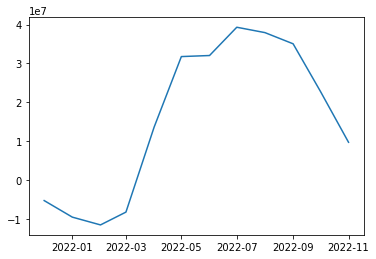

In [0]:
plt.plot(predictions)

Out[43]: <AxesSubplot:xlabel='mes_ano'>

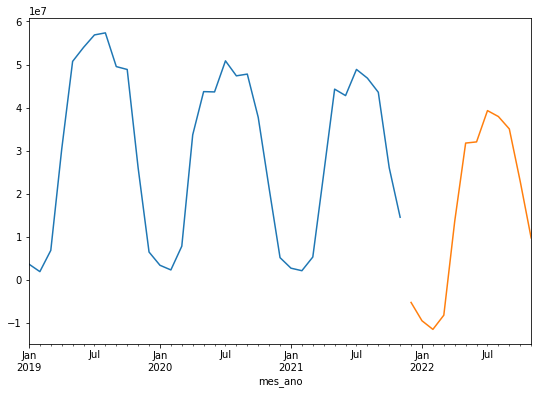

In [0]:
time_series['qtd_processada']['2019-01-01':].astype(float).plot(figsize = (9,6))
predictions.plot()

In [0]:
len(time_series)

Out[34]: 35

In [0]:
train = time_series[:25]
train.shape

Out[35]: (25, 1)

In [0]:
train.index.min(), train.index.max()

Out[36]: (Timestamp('2019-01-01 00:00:00'), Timestamp('2021-01-01 00:00:00'))

In [0]:
test = time_series[25:]
test.shape

Out[37]: (10, 1)

In [0]:
test.index.min(), test.index.max()

Out[38]: (Timestamp('2021-02-01 00:00:00'), Timestamp('2021-11-01 00:00:00'))

In [0]:
model2 = ExponentialSmoothing(endog = train.qtd_processada.astype(float),
                             trend = "add",
                             seasonal = "add",
                             seasonal_periods = 12).fit()
predictions = pd.DataFrame(model2.forecast(steps = 10), index=test.index)
predictions.columns = ['qtd_processada']

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


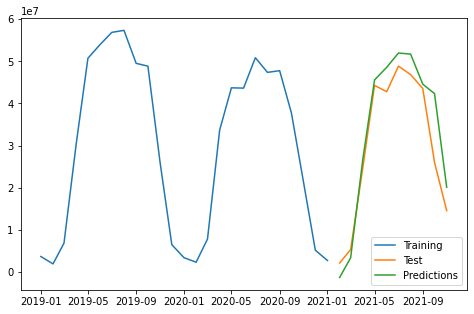

In [0]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(predictions, label = 'Predictions')
plt.legend();